In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append('..')

from astroLuSt.database_interface import alerceinterface as aldiai
from astroLuSt.database_interface import eleanorinterface as aldiei
from astroLuSt.database_interface import gaiainterface as aldigi
from astroLuSt.database_interface import lightkurveinterface as aldili
from astroLuSt.database_interface import simbadinterface as aldisi

import importlib
importlib.reload(aldiai)
importlib.reload(aldiei)
importlib.reload(aldigi)
importlib.reload(aldili)
importlib.reload(aldisi)

#style for plotting
plt.style.use('astroLuSt.styles.LuSt_style')



In [50]:
targets = [
    'KIC 5006817', 'RR Lyr', 'TV Boo'
]

# SimbadDatabaseInterface

In [51]:
SDI = aldisi.SimbadDatabaseInterface()
ids = SDI.get_ids(
    targets
)
tics = SDI.df_ids['TIC']
print(tics)

/home/lukas/github/astroLuSt/demos/../astroLuSt/database_interface/simbadinterface.py:105: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_ids = pd.unique(input_ids)


INFO: catalog is None. Corresponding id: G 125-7
0    122447138
1    159717514
2    168709463
Name: TIC, dtype: object


# EleanorDatabaseInterface

INFO(EleanorDatabaseInterface.download()): Extracting chunk 1/1 (0/1)


No eleanor postcard has been made for your target (yet). Using TessCut instead.


No eleanor postcard has been made for your target (yet). Using TessCut instead.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[array(['time', 'raw_flux', 'flux_err', 'corr_flux', 'quality', 'sector',
       'tess_mag', 'aperture_size', 'raw_flux_normalized',
       'corr_flux_normalized', 'pca_flux', 'pca_flux_normalized'],
      dtype='<U20')]


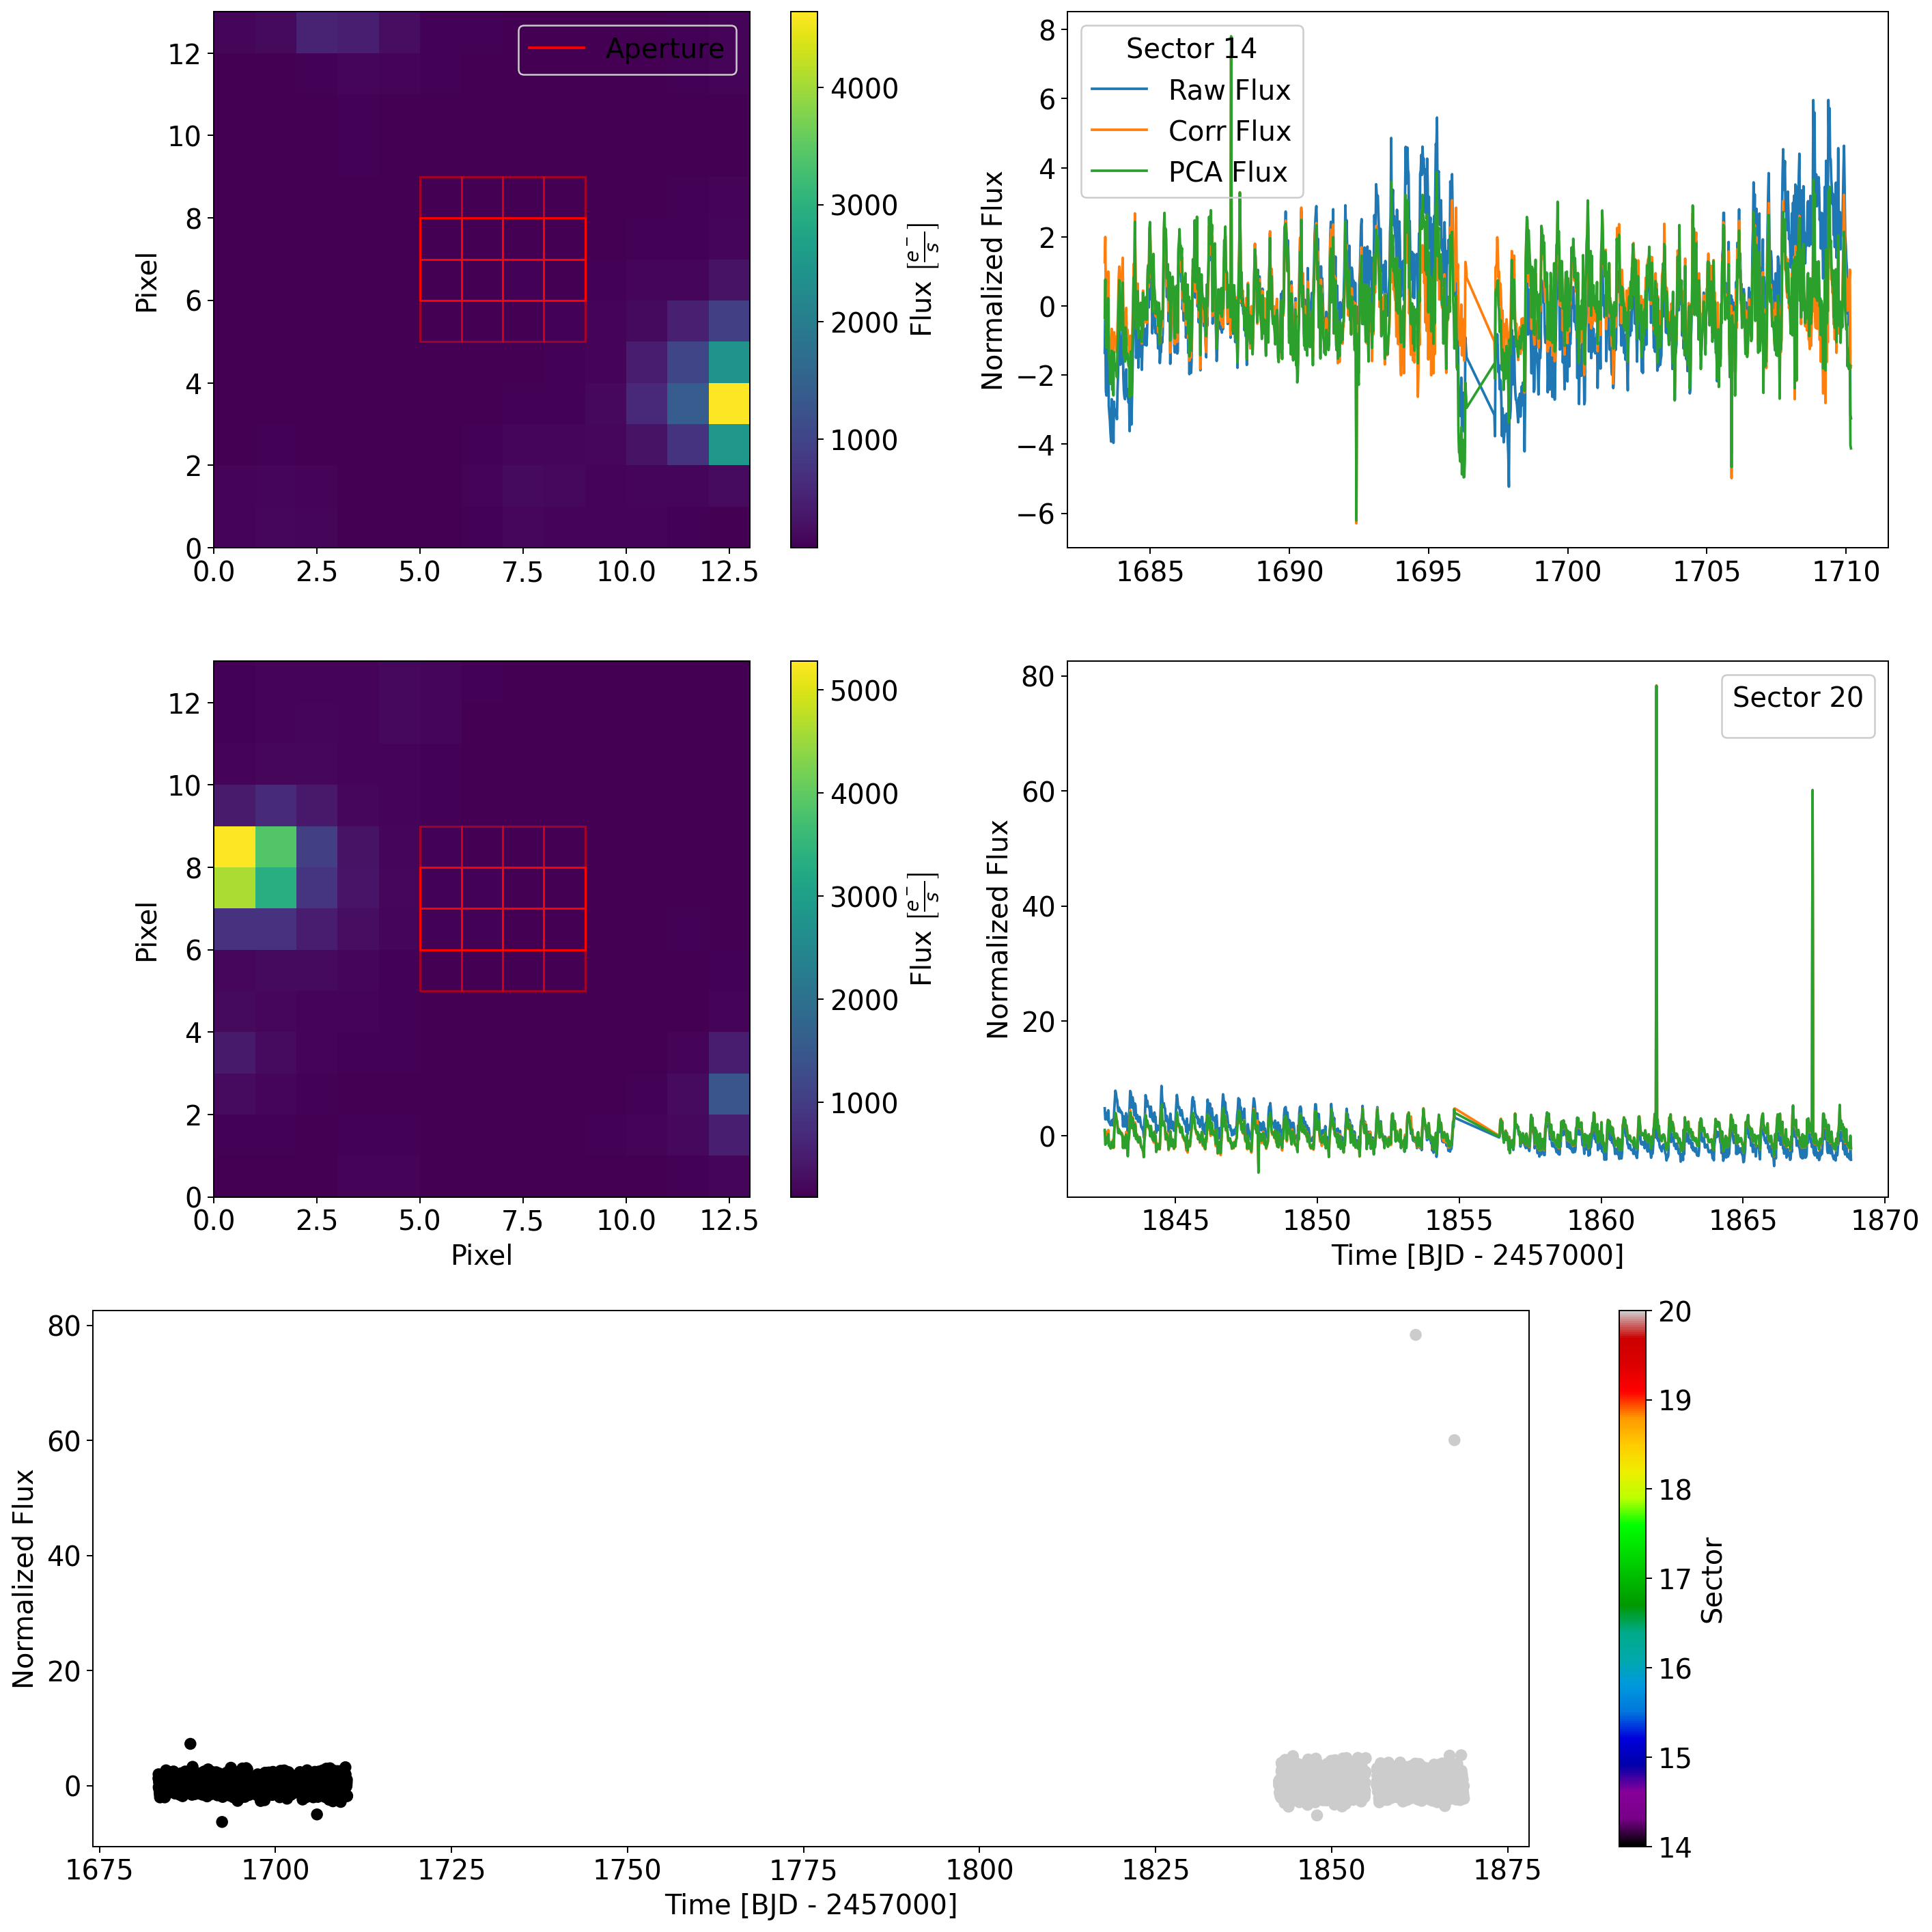

In [56]:
importlib.reload(aldiei)

EDI = aldiei.EleanorDatabaseInterface(
    n_jobs=1,
    redownload=True,
    verbose=3,
)

lcs, headers, tpfs, aperture_masks = EDI.download(
    sectors=[14,20],
    # sectors='all',
    # source_ids=[{'tic':tic} for tic in tics[:]],
    source_ids=[{'gaia': '2249474965068982272'}],
    get_normalized_flux=True, normfunc=lambda x: x/np.nanmedian(x),
    tpfs2store=slice(1), store_aperture_masks=True,
    # tpfs2store=None, store_aperture_masks=True,
    n_chunks=1,
    targetdata_kwargs=dict(do_pca=True, aperture_mode='small'),
    custom_aperture_kwargs=dict(shape='rectangle', h=3, w=4), #in case you want to use a custom aperture
    save_kwargs=dict(directory='./data/', pd_savefunc='to_parquet'),
)

print(headers)
fig, axs = EDI.plot_result(
    lcs=lcs[0],
    headers=headers[0],
    tpfs=tpfs[0],
    aperture_masks=aperture_masks[0],
)

plt.show()




# GaiaDatabaseInterface

In [ ]:
GID = aldigi.GaiaDatabaseInterface()
GID.gaia_crendetials = "../credentials_gaia.txt"

filter = "(jobs['phase'] == 'ERROR')"
GID.remove_all_jobs(pd_filter=filter, login_before=False, logout_after=False)


# AlerceDatabaseInterface

In [ ]:
importlib.reload(aldiai)

ADI = aldiai.AlerceDatabaseInterface()

df = pd.DataFrame(
    data=np.array([
        [10054,	12.39495833, 27.02213889,],
        # [10088,	353.7751667, np.inf,],#41.10291667,],
        [10140,	16.294625,	 34.21841667,],
        # [10147,	359.6756667, 41.48880556,],
    ]),
    columns=['id', 'ra', 'dec']
)

df_ztf = ADI.crossmerge_by_coordinates(
    df_left=df,
    ra_colname='ra', dec_colname='dec', radius=1,
    sleep=2E-3,
    n_jobs=1, verbose=2
)

print(ADI.df_error_msgs_crossmerge)

ADI.download_lightcurves(
    df_ztf['oid_ztf'],
    save=False,
    # save='./data/',
    redownload=False,
    plot_result=True, save_plot=False, close_plots=False,
    sleep=2E-3,
    n_jobs=1, verbose=2
)
print(ADI.df_error_msgs_lcdownload)

# LightkurveInterface

In [ ]:

importlib.reload(aldili)
LKI = aldili.LightkurveInterface(
    tics=tics.astype(np.float64)
)

LKI.download_lightcurves_tess(
    #saving data
    save=False,
    sectors='all',
    quality_expression="(datum.quality == 0)",
    include_aperture=False, include_tpf=False,
    #plotting
    plot_result=True,
    aperture_detail=50, ylims=None,
    fontsize=16, figsize=(16,9),
    save_plot=False,
    sleep=0,
    n_jobs=1, n_chunks=1,
    verbose=2
)

print(LKI.df_extraction_summary)